In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

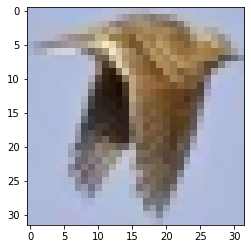

In [5]:
plt.imshow(x_train[123])

In [6]:
x_train = x_train/255

In [7]:
x_test = x_test/255

In [8]:
#one hot encoding
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [10]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [12]:
model = Sequential()
#CONV LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
#POOL LAYER
model.add(MaxPool2D(pool_size=(2,2)))
#CONV LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
#POOL LAYER
model.add(MaxPool2D(pool_size=(2,2)))
#Flattening image; 32*32*3 = 3072
model.add(Flatten()) 

model.add(Dense(256,activation='relu'))
# OUTPUT LAYER SOFTMAX -> MULTI CLASS ; dense layer must be equal to classes; 10 since 10 classes
model.add(Dense(10,activation='softmax'))

#Cat_Ent  bc categorical
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor="val_loss", patience = 2)

In [19]:
model.fit(x_train,y_cat_train,epochs=15, validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9259 - accuracy: 0.6787 - val_loss: 1.0226 - val_accuracy: 0.6494
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8327 - accuracy: 0.7099 - val_loss: 0.9965 - val_accuracy: 0.6549
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7607 - accuracy: 0.7334 - val_loss: 0.9573 - val_accuracy: 0.6741
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7007 - accuracy: 0.7550 - val_loss: 0.9723 - val_accuracy: 0.6830
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6398 - accuracy: 0.7782 - val_loss: 0.9556 - val_accuracy: 0.6897
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5873 - accuracy: 0.7925 - val_loss: 1.0194 - val_accuracy: 0.6776
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5317 - accuracy: 0.8129 - val_loss: 1.0517 - val_accuracy:

In [22]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

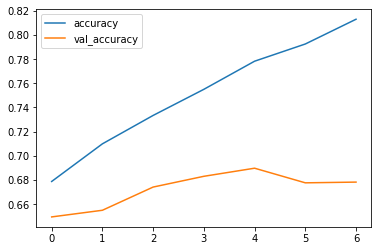

In [23]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

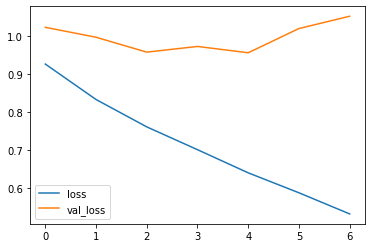

In [24]:
metrics[['loss','val_loss']].plot()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
preds = np.argmax(model.predict(x_test), axis=-1)

In [27]:
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1000
           1       0.82      0.78      0.80      1000
           2       0.59      0.60      0.59      1000
           3       0.47      0.57      0.51      1000
           4       0.62      0.62      0.62      1000
           5       0.67      0.47      0.55      1000
           6       0.84      0.69      0.75      1000
           7       0.70      0.78      0.74      1000
           8       0.70      0.83      0.76      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [28]:
my_img = x_test[1243]

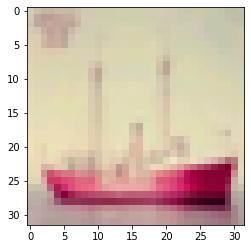

In [30]:
plt.imshow(my_img.reshape((32,32,3)))

In [32]:
# bacth_size, width, height, colour_channels
np.argmax(model.predict(my_img.reshape(1,32,32,3)))

8